In [1]:
import pandas as pd


In [2]:
# Esta es una opción para que se visualicen todas las columnas del DataFrame

pd.options.display.max_columns = None 

df_test = pd.read_csv('AlgorithmData_Test.csv', 
                            sep=',', 
                            header=0) # header=0 --> the header is in the first line (line[0])

df_test.head(10) # Mostramos solo los 10 primeros partidos del DataFrame

,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_Star,P_empty,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",141.421356,101.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A_Star,P_empty,45.0,0.0,45.0,100.0,"[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 4...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",100.000000,101.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A_Star,P_empty,0.0,45.0,100.0,45.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 4...",100.000000,101.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A_Star,P1,0.0,0.0,100.0,100.0,"[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",148.450794,2957.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A_Star,P1,45.0,0.0,45.0,100.0,"[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 4...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",100.000000,101.0,NaN


In [3]:
# Limpieza y correccion de datos
# eliminamos todos los registros vacios. La slineas vacias que se crearon en la generacion de los datos
# Aplico la eliminacion para todos los registros que tengan NaN en el campo Algorithm

df_test = df_test[df_test['Algorithm'].notna()]
# Corregir el dato P1_B por P1B
df_test.Map = df_test.Map.replace({"P1_B": 'P1B'})
# print (df_test)

# Elimino los registros que tienen posiciones de star y/o end diferentes de cero
df_test = df_test.drop(df_test[df_test['start_x'] == 45 ].index) 
df_test = df_test.drop(df_test[df_test['start_y'] == 45 ].index) 
df_test = df_test.drop(df_test[df_test['goal_x'] == 45 ].index) 
df_test = df_test.drop(df_test[df_test['goal_y'] == 45 ].index)
                                                                                
df_test

,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup
1,A_Star,P_empty,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",141.421356,101.0,NaN
7,A_Star,P1,0.0,0.0,100.0,100.0,"[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",148.450794,2957.0,NaN
13,A_Star,P2,0.0,0.0,100.0,100.0,"[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",148.450794,2962.0,NaN
19,A_Star,P3,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...",148.450794,3049.0,NaN
25,Bidirectional_A_Star,P_empty,0.0,0.0,100.0,100.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",141.421356,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
824,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.13021902437832, 98.18108682220567, 97...","[100, 99.71144718698541, 99.39656933320877, 99...",233.402185,17652.0,1.0
826,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.40511855841252, 98.44331984184423, 97...","[100, 99.83067837518185, 99.55692076559366, 99...",230.715812,15588.0,1.0
828,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.8362057939614, 98.96740408942983, 98....","[100, 99.9066480104875, 99.41148783619737, 98....",222.226995,16165.0,1.0
830,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.10340369287754, 98.13363076472713, 97...","[100, 99.7744031606625, 99.53039400545194, 99....",217.464591,20449.0,1.0


In [4]:
# df_test = df_test.head(10 ) # A modo de ejemplo voy a exportar solo información de 10 partidos de fútbol

# df_test.to_csv('ejemplo_export_DataFrame_csv.csv')


In [5]:
# ejemplo de exportar un dataframe a excel 

# df_test.to_excel('ejemplo_export_DataFrame_excel.xlsx')

In [6]:
# escritura de un dataframe en formato json

# df_test.to_json('ejemplo_export_DataFrame_JSON.json')

In [7]:
df_test.columns  # devulve las columnas del dataframe


Index(['Algorithm', 'Map', 'start_x', 'start_y', 'goal_x', 'goal_y', 'x_coord',
       'y_coord', 'Path_length', 'Iteration', 'Setup'],
      dtype='object')

In [8]:
list(df_test.columns)    # pasamos las columnas a una lista

['Algorithm',
 'Map',
 'start_x',
 'start_y',
 'goal_x',
 'goal_y',
 'x_coord',
 'y_coord',
 'Path_length',
 'Iteration',
 'Setup']

In [9]:
# df_test.values   # devuleve un numpy array con los valores del DataFrame
# Para este caso no es relevante

In [10]:
df_test.shape    # devuelve una tupla con las dimensiones del DataFrame

(312, 11)

In [11]:
len(df_test) # devuelve el numero de filas del DataFrame

312

In [12]:
df_test.info()   # muestra la informacion --> numero de filas, columnas, tipos de datos, memoria que ocupa

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 832
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Algorithm    312 non-null    object 
 1   Map          312 non-null    object 
 2   start_x      312 non-null    float64
 3   start_y      312 non-null    float64
 4   goal_x       312 non-null    float64
 5   goal_y       312 non-null    float64
 6   x_coord      312 non-null    object 
 7   y_coord      312 non-null    object 
 8   Path_length  312 non-null    float64
 9   Iteration    312 non-null    float64
 10  Setup        200 non-null    float64
dtypes: float64(7), object(4)
memory usage: 37.4+ KB


In [15]:
df_test.describe()   # muestra estadisticos descriptivos de las columnas. cuneta los elementos, media, std, min, 
# Q1, Q2, Q3, max


,start_x,start_y,goal_x,goal_y,Path_length,Iteration,Setup
count,312.0,312.0,312.0,312.0,312.000000,312.000000,200.000000
mean,0.0,0.0,100.0,100.0,191.904278,3997.551282,3.000000
std,0.0,0.0,0.0,0.0,28.069803,5779.647219,1.417762
min,0.0,0.0,100.0,100.0,140.007143,3.000000,1.000000
25%,0.0,0.0,100.0,100.0,175.381179,790.500000,2.000000
50%,0.0,0.0,100.0,100.0,191.783112,1677.500000,3.000000
75%,0.0,0.0,100.0,100.0,214.228776,3115.000000,4.000000
max,0.0,0.0,100.0,100.0,274.151545,21432.000000,5.000000


In [13]:
# Filtros, de acuerdo a las caracteristicas dadas para evaluacion 
df_test[df_test.Map == 'C5A']

,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup
399,RRT,C5A,0.0,0.0,100.0,100.0,"[100, 98.31473648538474, 88.34710905504221, 78...","[100, 99.86406607990844, 99.06007390962301, 98...",201.061208,258.0,NaN
407,RRT_Path_Smoothing,C5A,0.0,0.0,100.0,100.0,"[100, 99.72388519154963, 99.723764620773, 94.6...","[100, 96.08429352917793, 96.0825836615584, 14....",183.456441,634.0,NaN
415,RRT_Sobol_Sampler,C5A,0.0,0.0,100.0,100.0,"[100, 99.29635230548769, 97.2067699027437, 95....","[100, 96.70692878968225, 86.92768314484113, 77...",226.895300,428.0,NaN


In [14]:
# Filtro con multiples condiciones 
# df_test[(df_test.Map == 'C4A') & (df_test.Algorithm == 'RRT, 2')]

In [15]:
# crear nueva columna a partir de las existentes. Con condicionales
df_test['Obstacle_type'] = df_test['Map'].apply(lambda x: 'Concave' if x == 'C3' or x == 'C3A' or x == 'C3B'
                                                    or x == 'C4' or x == 'C4A' or x == 'C4B'
                                                    or x == 'C5' or x == 'C5A' or x == 'C5B'
                                                    else 'Convex')

df_test['Algorithm Type'] = df_test['Algorithm'].apply(lambda x: 'Deterministic' if (x == 'A_Star' or 
                                                    x == 'Bidirectional_A_Star' or x == 'Bidirectional_BFS' 
                                                    or x == 'BFS' or x == 'DFS' or x == 'Dijkstra'
                                                    or x == 'D_Star' or x == 'Greedy_BFS' or 
                                                    x == 'Visibility_Road_Map') else 'Probabilistic')

# Agrego campo Q_obst (cantidad de cuadros -nodos- ocupados por los obstaculosen cada scenario)
df_test['Q_obstacle'] = df_test['Map'].apply(lambda x: 0 if x == 'P_empty' or x == 'P1A_empty' or x == 'P1B_empty' 
                                                    else (242 if x == 'P1' or x == 'P1A' or x == 'P1B'
                                                    or x == 'P2' or x == 'P2A' or x == 'P2B'
                                                    or x == 'P3' or x == 'P3A' or x == 'P3B' 
                                                    else (1692 if x == 'C1' or x == 'C1A' or x == 'C1B'
                                                    else (1342 if x == 'C2' or x == 'C2A' or x == 'C2B'
                                                    else (2952 if x == 'C3' or x == 'C3A' or x == 'C3B'
                                                    else 2431)))))

df_test

,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup,Obstacle_type,Algorithm Type,Q_obstacle
1,A_Star,P_empty,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",141.421356,101.0,NaN,Convex,Deterministic,0
7,A_Star,P1,0.0,0.0,100.0,100.0,"[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",148.450794,2957.0,NaN,Convex,Deterministic,242
13,A_Star,P2,0.0,0.0,100.0,100.0,"[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...","[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...",148.450794,2962.0,NaN,Convex,Deterministic,242
19,A_Star,P3,0.0,0.0,100.0,100.0,"[100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, ...","[100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 95, ...",148.450794,3049.0,NaN,Convex,Deterministic,242
25,Bidirectional_A_Star,P_empty,0.0,0.0,100.0,100.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",141.421356,51.0,NaN,Convex,Deterministic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.13021902437832, 98.18108682220567, 97...","[100, 99.71144718698541, 99.39656933320877, 99...",233.402185,17652.0,1.0,Concave,Probabilistic,2431
826,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.40511855841252, 98.44331984184423, 97...","[100, 99.83067837518185, 99.55692076559366, 99...",230.715812,15588.0,1.0,Concave,Probabilistic,2431
828,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.8362057939614, 98.96740408942983, 98....","[100, 99.9066480104875, 99.41148783619737, 98....",222.226995,16165.0,1.0,Concave,Probabilistic,2431
830,RRT_Star,C4A,0.0,0.0,100.0,100.0,"[100, 99.10340369287754, 98.13363076472713, 97...","[100, 99.7744031606625, 99.53039400545194, 99....",217.464591,20449.0,1.0,Concave,Probabilistic,2431


In [16]:
# ejemplo de agregacion

df_test.groupby(['Algorithm Type']).agg(['count'])


,Algorithm,Map,start_x,start_y,goal_x,goal_y,x_coord,y_coord,Path_length,Iteration,Setup,Obstacle_type,Q_obstacle
,count,count,count,count,count,count,count,count,count,count,count,count,count
Algorithm Type,,,,,,,,,,,,,
Deterministic,81,81,81,81,81,81,81,81,81,81,0,81,81
Probabilistic,231,231,231,231,231,231,231,231,231,231,200,231,231


In [67]:
# Primero ordeno segun el algorithm

df_test.groupby(['Algorithm'])['Path_length'] \
           .agg(['count', 'sum', 'mean', 'median', 'max', 'min', 'std', 'var', 'first', 'last']) \
           .reset_index()

# df_test.sort_values(by='Algorithm Type', ascending=True)


,Algorithm,count,sum,mean,median,max,min,std,var,first,last
0,A_Star,9,1454.971788,161.663532,163.095454,189.455844,141.421356,17.622611,310.556436,141.421356,189.455844
1,BFS,9,1454.971788,161.663532,163.095454,189.455844,141.421356,17.622611,310.556436,141.421356,189.455844
2,Bidirectional_A_Star,9,1456.143361,161.793707,163.095454,190.627417,141.421356,17.856347,318.849125,141.421356,190.627417
3,Bidirectional_BFS,9,1456.143361,161.793707,163.095454,189.455844,142.007143,17.546181,307.868460,142.007143,189.455844
4,DFS,9,1716.855265,190.761696,195.161472,257.386868,141.421356,42.593688,1814.222224,141.421356,257.386868
5,D_Star,9,1440.871283,160.096809,161.509668,187.870058,140.007143,17.598053,309.691454,140.007143,187.870058
6,Dijkstra,9,1454.971788,161.663532,163.095454,189.455844,141.421356,17.622611,310.556436,141.421356,189.455844
7,Greedy_BFS,9,1506.854039,167.428227,166.752309,215.137085,141.421356,23.173992,537.033903,141.421356,190.284271
8,RRT,58,12638.373706,217.902995,220.305000,274.151545,158.517015,22.715304,515.985032,176.164465,194.291419
9,RRT_Path_Smoothing,58,10635.489739,183.370513,183.995736,256.670128,142.072072,16.432311,270.020855,142.072072,181.673931


In [30]:
df_test.groupby(['Algorithm', 'Algorithm Type'])['Iteration'] \
           .agg(['count', 'sum', 'mean', 'median', 'std']) \
           .reset_index()

,Algorithm,Algorithm Type,count,sum,mean,median,std
0,A_Star,Deterministic,9,32128.0,3569.777778,3049.0,1846.507161
1,BFS,Deterministic,9,76480.0,8497.777778,8427.0,1298.545030
2,Bidirectional_A_Star,Deterministic,9,9737.0,1081.888889,980.0,552.486299
3,Bidirectional_BFS,Deterministic,9,24768.0,2752.000000,2884.0,345.335344
4,DFS,Deterministic,9,1223.0,135.888889,139.0,30.118285
5,D_Star,Deterministic,9,1203.0,133.666667,136.0,29.941610
6,Dijkstra,Deterministic,9,76047.0,8449.666667,8427.0,1362.819962
7,Greedy_BFS,Deterministic,9,4454.0,494.888889,140.0,1084.075348
8,RRT,Probabilistic,58,236045.0,4069.741379,1757.0,5944.167743
9,RRT_Path_Smoothing,Probabilistic,58,268649.0,4631.879310,2120.5,6427.022500


GRAFICOS

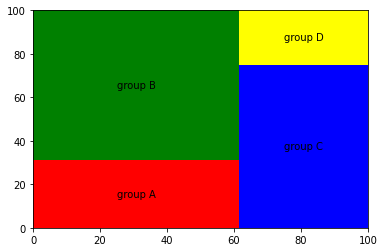

In [32]:
import squarify
import matplotlib.pyplot as plt
import numpy as np

# TREE MAP

labels = label=["group A", "group B", "group C", "group D"]
sizes=[100, 220, 150, 50]
color=["red", "green", "blue", "yellow"]
 
# Change color
squarify.plot(sizes=sizes, label=labels, color=color)
plt.show()

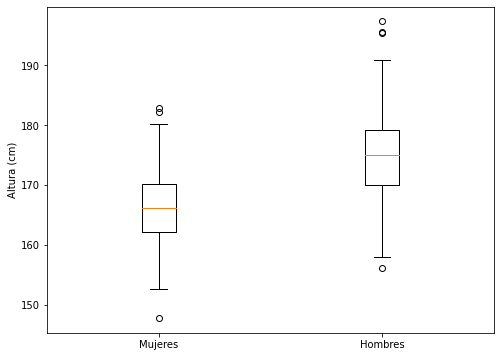

In [33]:
# Generamos una distribución normal de media 166 y de desviación típica 10
alt_mujeres = np.random.normal(166, 8.2, 100) 
# Generamos una distribución normal de media 176 y de desviación típica 7.6
alt_hombres = np.random.normal(176, 7.6, 100) 

fig, ax = plt.subplots(figsize=(8, 6))
plt.boxplot([alt_mujeres, alt_hombres], labels= ['Mujeres', 'Hombres'])
ax.set_ylabel('Altura (cm)')
plt.show()

<hr>


## 8. Gráficos de Violines


* Un diagrama de violín se utiliza para ***visualizar la distribución de los datos y su densidad de probabilidad***.


* Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para ***mostrar la forma de distribución de los datos***.

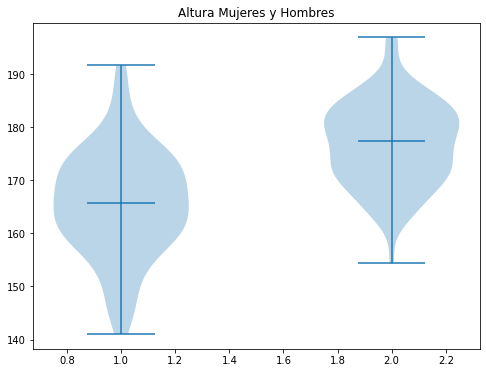

In [34]:
# Generamos una distribución normal de media 166 y de desviación típica 10
alt_mujeres = 166 + 10 * np.random.randn(100) 
# Generamos una distribución normal de media 176 y de desviación típica 7.6
alt_hombres = 176 + 7.6 * np.random.randn(100) 

fig, ax = plt.subplots(figsize=(8, 6))

# plot violin plot
ax.violinplot([alt_mujeres, alt_hombres], showmeans=False, showmedians=True)
ax.set_title('Altura Mujeres y Hombres')
plt.show()

# 12 - Graficos Seaborn


* El siguiente Notebook tiene como objetivo ***mostrar*** algunos de los tipos de ***gráficos más importantes*** para la ***representación visual de información*** con la librería de ***Seaborn***.



* ***Seaborn*** es una librería basada en MatplotLib que facilita la creación de gráficos sobre todo cuando trabajamos con DataFrames de Pandas, ya que su representación es directa.


* Para más información de los gráficos que permite Seaborn, visitar el siguiente enlace: https://seaborn.pydata.org/api.html


In [35]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_tips = sns.load_dataset("tips")
df_titanic = sns.load_dataset("titanic")
df_iris = sns.load_dataset("iris")
df_flights = sns.load_dataset("flights")

<AxesSubplot:xlabel='Algorithm', ylabel='Iteration'>

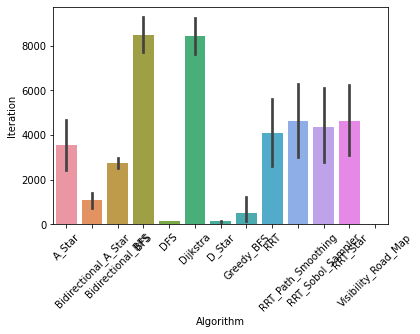

In [70]:
# Grafico de barras
degrees = 90
plt.xticks(rotation=degrees)
sns.barplot(x="Algorithm", y="Iteration", data=df_test)



<AxesSubplot:xlabel='Algorithm', ylabel='Path_length'>

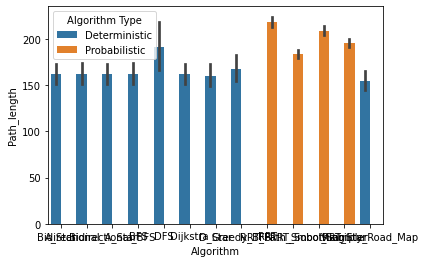

In [42]:
# Se puede clasificar mas los graficos

sns.barplot(x="Algorithm", y="Path_length", hue="Algorithm Type", data=df_test)


<AxesSubplot:xlabel='Algorithm', ylabel='Iteration'>

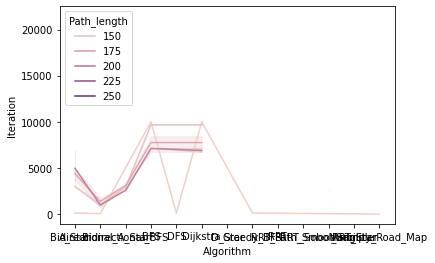

In [43]:
# VArios graficos de linea en un solo figure

sns.lineplot(x="Algorithm", y="Iteration", hue="Path_length", data=df_test)



<AxesSubplot:xlabel='Path_length', ylabel='Iteration'>

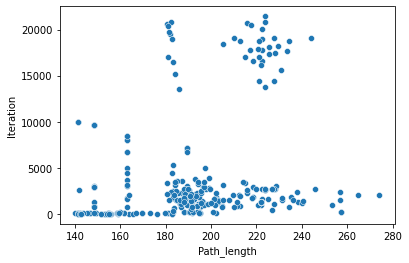

In [44]:
# Scatter muestra la relacion que existe entre dos variables

sns.scatterplot(x="Path_length", y="Iteration", data=df_test)


<AxesSubplot:xlabel='Path_length', ylabel='Iteration'>

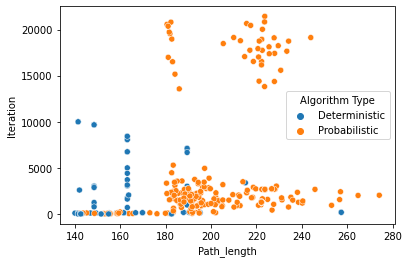

In [45]:
# se puede difereciar por tipos 

sns.scatterplot(x="Path_length", y="Iteration", hue="Algorithm Type", data=df_test)


Text(0, 0.5, '%')

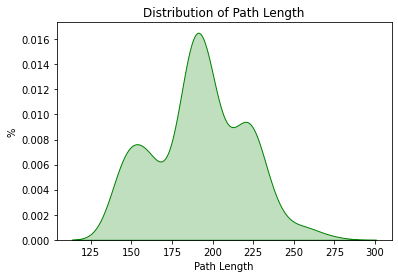

In [46]:
# Histogramas

sns.kdeplot(df_test['Path_length'], shade=True, color="g")
plt.title('Distribution of Path Length')
plt.xlabel('Path Length')
plt.ylabel('%')


<AxesSubplot:xlabel='Algorithm Type', ylabel='Iteration'>

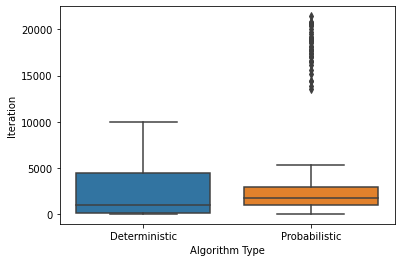

In [49]:
# Graficos de cajas y bigotes. X debe ser numerico (xq se analiza su dispersion)

sns.boxplot(x="Algorithm Type", y="Iteration", data=df_test)


<AxesSubplot:xlabel='Algorithm', ylabel='Iteration'>

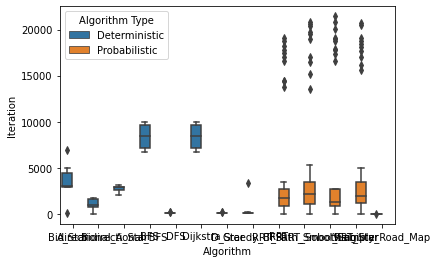

In [50]:
# e puede tambien analizar por grupos
sns.boxplot(x="Algorithm", y="Iteration", hue="Algorithm Type", data=df_test)


<AxesSubplot:xlabel='Path_length'>

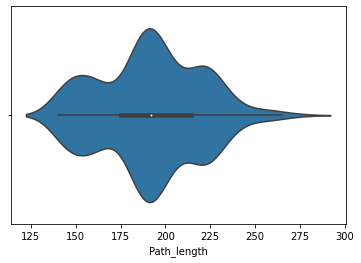

In [51]:
# Diagrama de violines, visualiza la distriubucion de datos y su densidad de probabilidad

sns.violinplot(x="Path_length", data=df_test)


<AxesSubplot:xlabel='Algorithm', ylabel='Path_length'>

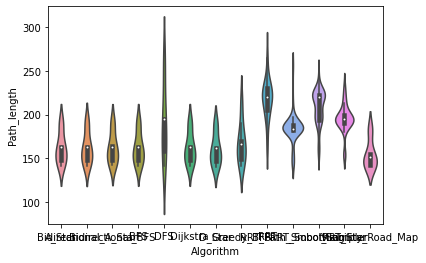

In [52]:
# Podemos poner mas atributos diferenciadores

sns.violinplot(x="Algorithm", y="Path_length", data=df_test)


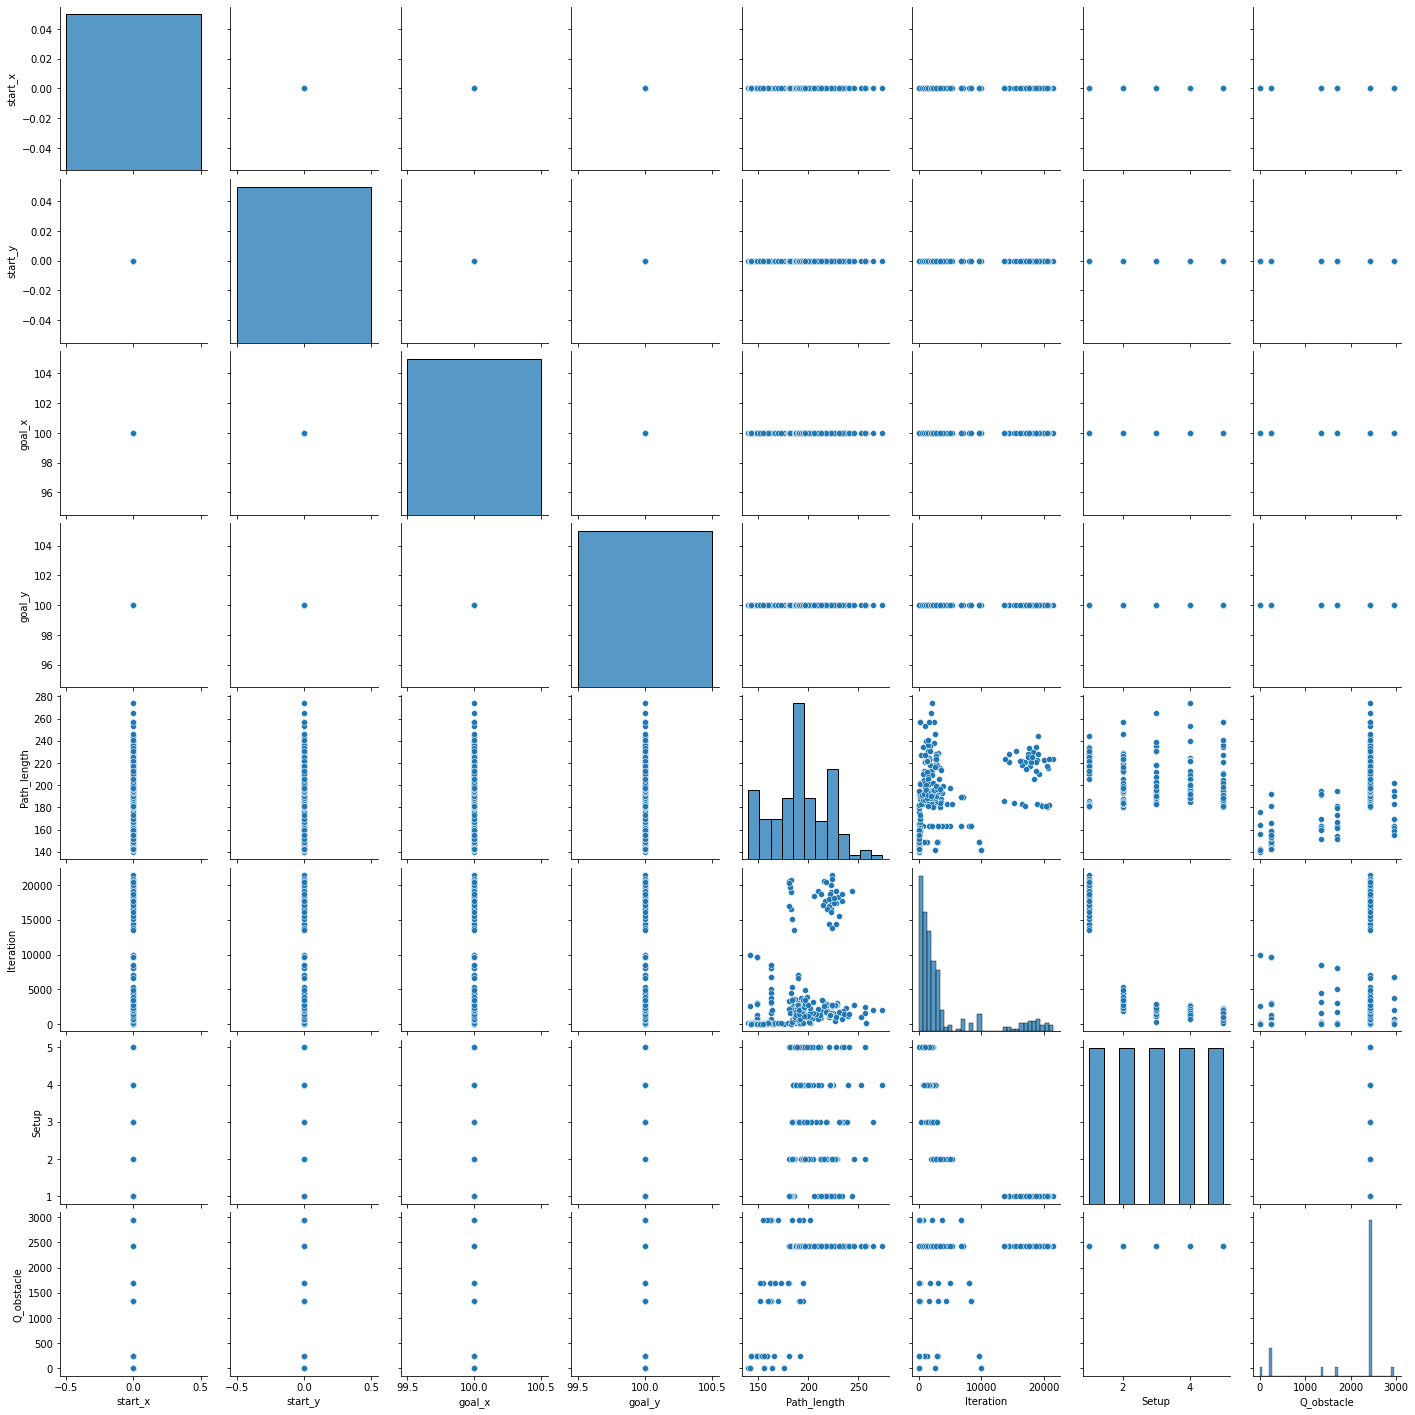

In [53]:
# Este tipo de gráfico nos permite ver las relaciones entre cada par de variables del Dataset

sns.pairplot(df_test)


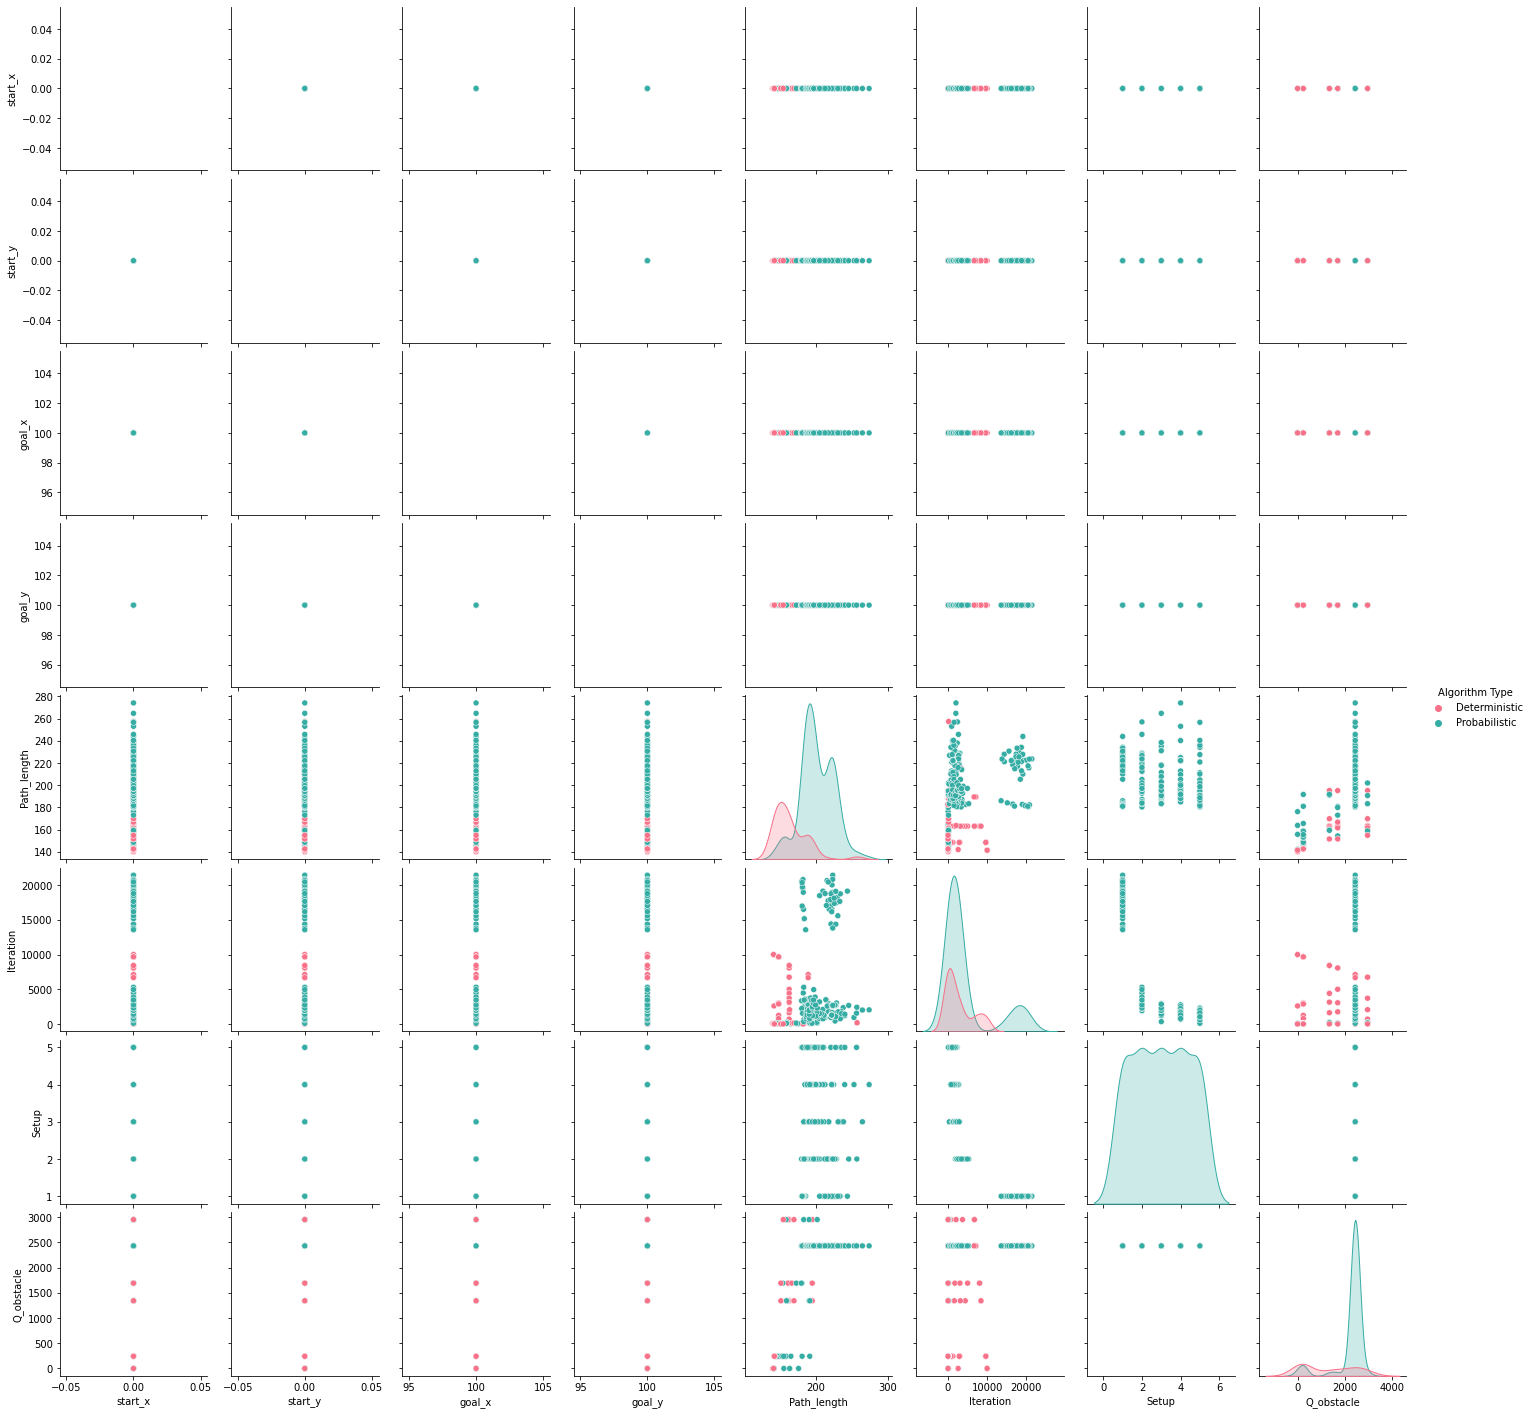

In [54]:
# Podemos diferenciar por algunas variables

sns.pairplot(df_test, hue="Algorithm Type", palette="husl")

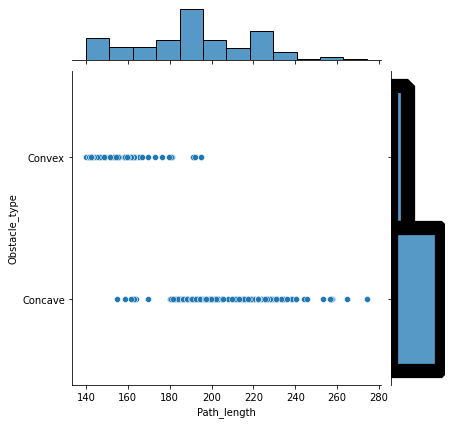

In [58]:
# Muestra la relacion entre dos pares de variables y sus distribuciones

sns.jointplot(x="Path_length", y="Obstacle_type", data=df_test)


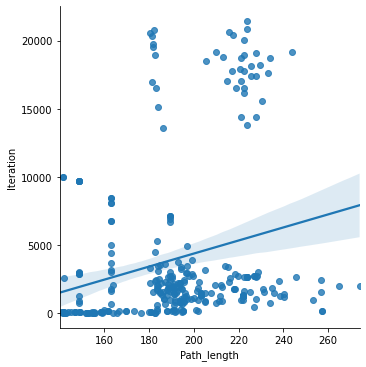

In [60]:
# Muestra la relacion entre un par de variables y su recta de regresion

sns.lmplot(x="Path_length", y="Iteration", data=df_test)


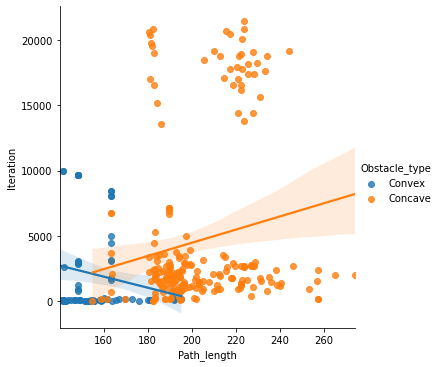

In [61]:
# Podemos diferenciar por alguna clase

sns.lmplot(x="Path_length", y="Iteration", hue="Obstacle_type", data=df_test)


In [63]:
from pandas_profiling import ProfileReport
from scipy import stats as st

# Creamos el reporte
profile = ProfileReport(df=df_test, title='Profiling Report Felicidad', explorative=True)

# Lo exportamos a HTML
profile.to_file(".Reporte_PP.html")

# Mostramos el reporte por pantalla
profile

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


In [66]:
# Eliminacion de columnas 
df_test.drop(['start_x', 'start_y', 'goal_x', 'goal_y',
         'x_coord', 'y_coord'], 1, inplace=True)

df_test

KeyError: "['start_x' 'start_y' 'goal_x' 'goal_y' 'x_coord' 'y_coord'] not found in axis"